In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snp
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('fivethirtyeight')




from sklearn.model_selection import train_test_split

In [3]:
advertising = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
advertising.head()    

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


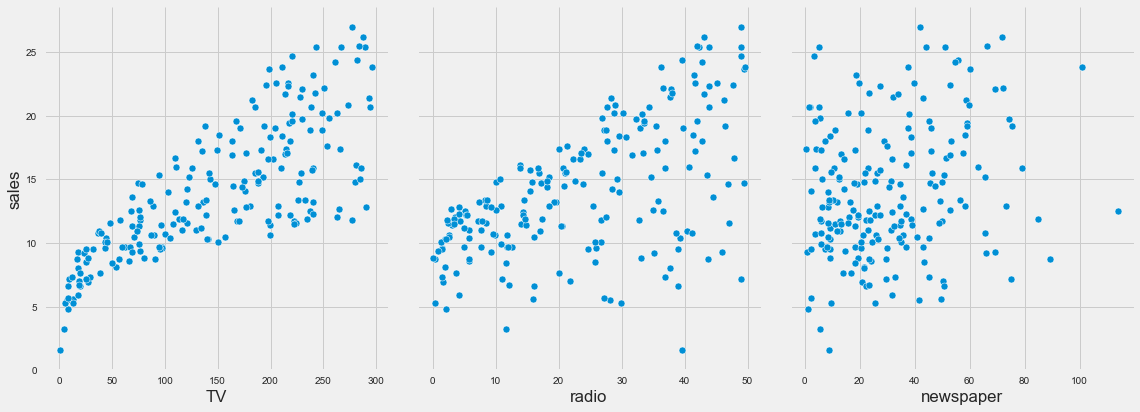

In [17]:
snp.pairplot(data=advertising,x_vars=['TV','radio','newspaper'],y_vars='sales',aspect=0.9,size=6)

In [23]:
lm=smf.ols(formula='sales~TV',data=advertising).fit()
print("Coficients :\n%s \n\np-values:\n%s \n\nr-squared:\n%s" % (lm.params,lm.pvalues,lm.rsquared))

Coficients :
Intercept    7.032594
TV           0.047537
dtype: float64 

p-values:
Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64 

r-squared:
0.61187505085


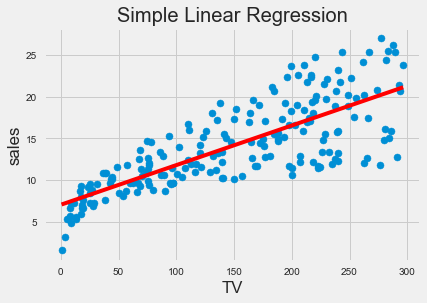

In [34]:
plt.scatter(advertising.TV,advertising.sales)
plt.xlabel("TV")
plt.ylabel("sales")
X = pd.DataFrame({'TV':[advertising.TV.min(), advertising.TV.max()]})
y_predict=lm.predict(X)
plt.plot(X,y_predict,c='red')
plt.title("Simple Linear Regression")


(0, 28.295456656164269)

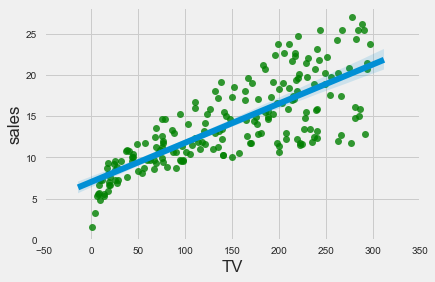

In [39]:
snp.regplot(advertising.TV,advertising.sales,order=1,scatter_kws={'color':'g'})
plt.xlim(-50,350)
plt.ylim(ymin=0)

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 25 Sep 2017   Prob (F-statistic):           1.47e-42
Time:                        21:54:04   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
x_new=pd.DataFrame({'TV':[100]})
lm.predict(x_new)

0    11.786258
dtype: float64

In [48]:
sales_manual=lm.params.Intercept+lm.params.TV*100
sales_manual

11.786257592429667

In [51]:
lm_mul=smf.ols(formula='sales~TV+sales+newspaper',data=advertising).fit()
lm_mul.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.489e+30
Date:                Mon, 25 Sep 2017   Prob (F-statistic):               0.00
Time:                        22:04:01   Log-Likelihood:                 6026.3
No. Observations:                 200   AIC:                        -1.204e+04
Df Residuals:                     196   BIC:                        -1.203e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    9.77e-15   4.29e-15      2.278      0.024    1.31e-15    1.82e-14
TV         -8.327e-17   2.71e-17     -3.069      0.002   -1.37e-16   -2.98e-17
sales          1.0000   4.58e-16   2.18e+15      0.000       1.000       1.000
newspaper  -1.093e-16   6.84e-17     -1.597      0.112   -2.44e-16    2.57e-17
==============================================================================
Omnibus:                        8.864   Durbin-Watson:                   0.602
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                4.180
Skew:                           0.039   Prob(JB):                        0.124
Kurtosis:                       2.296   Cond. No.                         524.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
credit = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', usecols=list(range(1,12)))
# credit = pd.read_csv('data\Credit.csv', usecols=list(range(1,12)))
# credit.to_csv('Desktop/Credit.csv',index=False)
data=pd.read_csv('Desktop/Credit.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [12]:
data.isnull().sum()
data.head(5)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


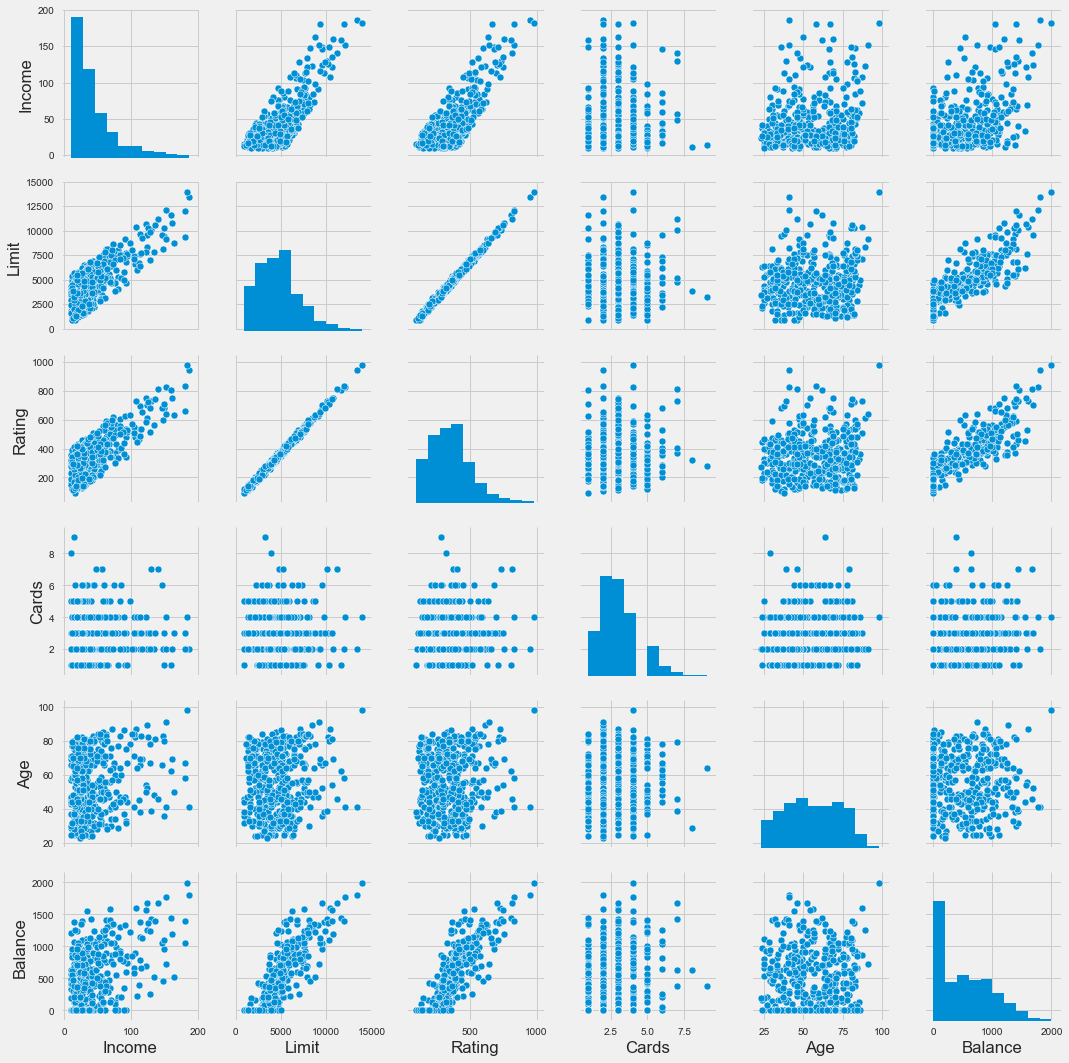

In [17]:
snp.pairplot(data[['Income','Limit','Rating','Cards','Age','Balance']])

In [20]:
lm_cat=smf.ols(formula='Balance~Gender',data=data).fit()
lm_cat.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,509.8031,33.128,15.389,0.000,444.675,574.931
Gender[T.Female],19.7331,46.051,0.429,0.669,-70.801,110.267


In [24]:
lm_cat=smf.ols(formula='Balance~Ethnicity',data=data).fit()
lm_cat.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,531.0000,46.319,11.464,0.000,439.939,622.061
Ethnicity[T.Asian],-18.6863,65.021,-0.287,0.774,-146.515,109.142
Ethnicity[T.Caucasian],-12.5025,56.681,-0.221,0.826,-123.935,98.930


In [27]:
lm_cat_edu=smf.ols(formula='Balance~Education',data=data).fit()
lm_cat_edu.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.02587
Date:                Tue, 26 Sep 2017   Prob (F-statistic):              0.872
Time:                        19:52:28   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    535.9662    101.814      5.264      0.000     335.805     736.127
Education     -1.1860      7.374     -0.161      0.872     -15.683      13.311
==============================================================================
Omnibus:                       28.655   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.467
Skew:                           0.584   Prob(JB):                     1.09e-06
Kurtosis:                       2.467   Cond. No.                         61.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
lm_all = smf.ols('Balance ~ Student+Cards+Income+Rating+Limit+Education+Gender+Age+Married+Ethnicity',data).fit()
print(lm_all.rsquared)
lm_all.summary().tables[1]

0.955101563365


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-479.2079,35.774,-13.395,0.000,-549.543,-408.873
Student[T.Yes],425.7474,16.723,25.459,0.000,392.869,458.626
Gender[T.Female],-10.6532,9.914,-1.075,0.283,-30.145,8.839
Married[T.Yes],-8.5339,10.363,-0.824,0.411,-28.908,11.841
Ethnicity[T.Asian],16.8042,14.119,1.190,0.235,-10.955,44.564
Ethnicity[T.Caucasian],10.1070,12.210,0.828,0.408,-13.899,34.113
Cards,17.7245,4.341,4.083,0.000,9.190,26.259
Income,-7.8031,0.234,-33.314,0.000,-8.264,-7.343
Rating,1.1365,0.491,2.315,0.021,0.171,2.102
Limit,0.1909,0.033,5.824,0.000,0.126,0.255


In [31]:
lm_all = smf.ols('Balance ~ Student+Cards+Income+Rating+Limit+Gender+Age',credit).fit()
print(lm_all.rsquared)
lm_all.summary().tables[1]

0.95481666169


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-488.6159,25.289,-19.321,0.000,-538.335,-438.897
Student[T.Yes],426.5813,16.533,25.802,0.000,394.077,459.085
Gender[T.Female],-10.4532,9.890,-1.057,0.291,-29.896,8.990
Cards,18.1092,4.319,4.193,0.000,9.618,26.601
Income,-7.8036,0.234,-33.417,0.000,-8.263,-7.345
Rating,1.0940,0.485,2.257,0.025,0.141,2.047
Limit,0.1936,0.032,5.980,0.000,0.130,0.257
Age,-0.6207,0.292,-2.127,0.034,-1.194,-0.047


In [40]:
lm_all = smf.ols('Balance ~ Student+Cards+Income+Rating',credit).fit()
print(lm_all.rsquared)
lm_all.summary().tables[1]

0.950004560808


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-591.2360,17.182,-34.411,0.000,-625.015,-557.457
Student[T.Yes],419.1517,17.235,24.320,0.000,385.268,453.035
Cards,3.7851,3.797,0.997,0.319,-3.680,11.250
Income,-7.8513,0.241,-32.527,0.000,-8.326,-7.377
Rating,3.9814,0.055,72.335,0.000,3.873,4.090


In [44]:
lm_interact=smf.ols(formula='sales~TV+radio+TV:radio',data=advertising).fit()
print(lm_interact.rsquared)
lm_interact.summary().tables[1]

0.967790549848


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


In [47]:
lm_interact=smf.ols(formula='sales~TV+newspaper*radio',data=advertising).fit()
print(lm_interact.rsquared)
lm_interact.summary().tables[1]

0.897452605461


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.1467,0.437,7.193,0.000,2.284,4.009
TV,0.0458,0.001,32.746,0.000,0.043,0.049
newspaper,-0.0094,0.014,-0.688,0.492,-0.036,0.018
radio,0.1801,0.015,11.930,0.000,0.150,0.210
newspaper:radio,0.0003,0.000,0.678,0.498,-0.001,0.001


In [49]:
lm_no_interact = smf.ols('Balance ~ Income  + Student', data).fit()   
lm_no_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Tue, 26 Sep 2017   Prob (F-statistic):           9.64e-29
Time:                        21:52:04   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.505      0.000     147.333     274.952
Student[T.Yes]   382.6705     65.311      5.859      0.000     254.272     511.069
Income             5.9843      0.557     10.751      0.000       4.890       7.079
==============================================================================
Omnibus:                      119.719   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.617
Skew:                           0.252   Prob(JB):                     7.44e-06
Kurtosis:                       1.922   Cond. No.                         192.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
auto = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Auto.csv')
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [18]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [19]:
auto_problem=auto[auto.horsepower.apply(lambda x:not(x.isnumeric()))]
auto.to_csv('Desktop/Auto.csv')



In [24]:
auto=pd.read_csv('Desktop/Auto.csv',na_values='?').dropna()
auto.info()
auto.iloc[28: 34]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 10 columns):
Unnamed: 0      392 non-null int64
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null int64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 33.7+ KB


,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
28,28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d
29,29,27.0,4,97.0,88.0,2130,14.5,71,3,datsun pl510
30,30,28.0,4,140.0,90.0,2264,15.5,71,1,chevrolet vega 2300
31,31,25.0,4,113.0,95.0,2228,14.0,71,3,toyota corona
33,33,19.0,6,232.0,100.0,2634,13.0,71,1,amc gremlin
34,34,16.0,6,225.0,105.0,3439,15.5,71,1,plymouth satellite custom


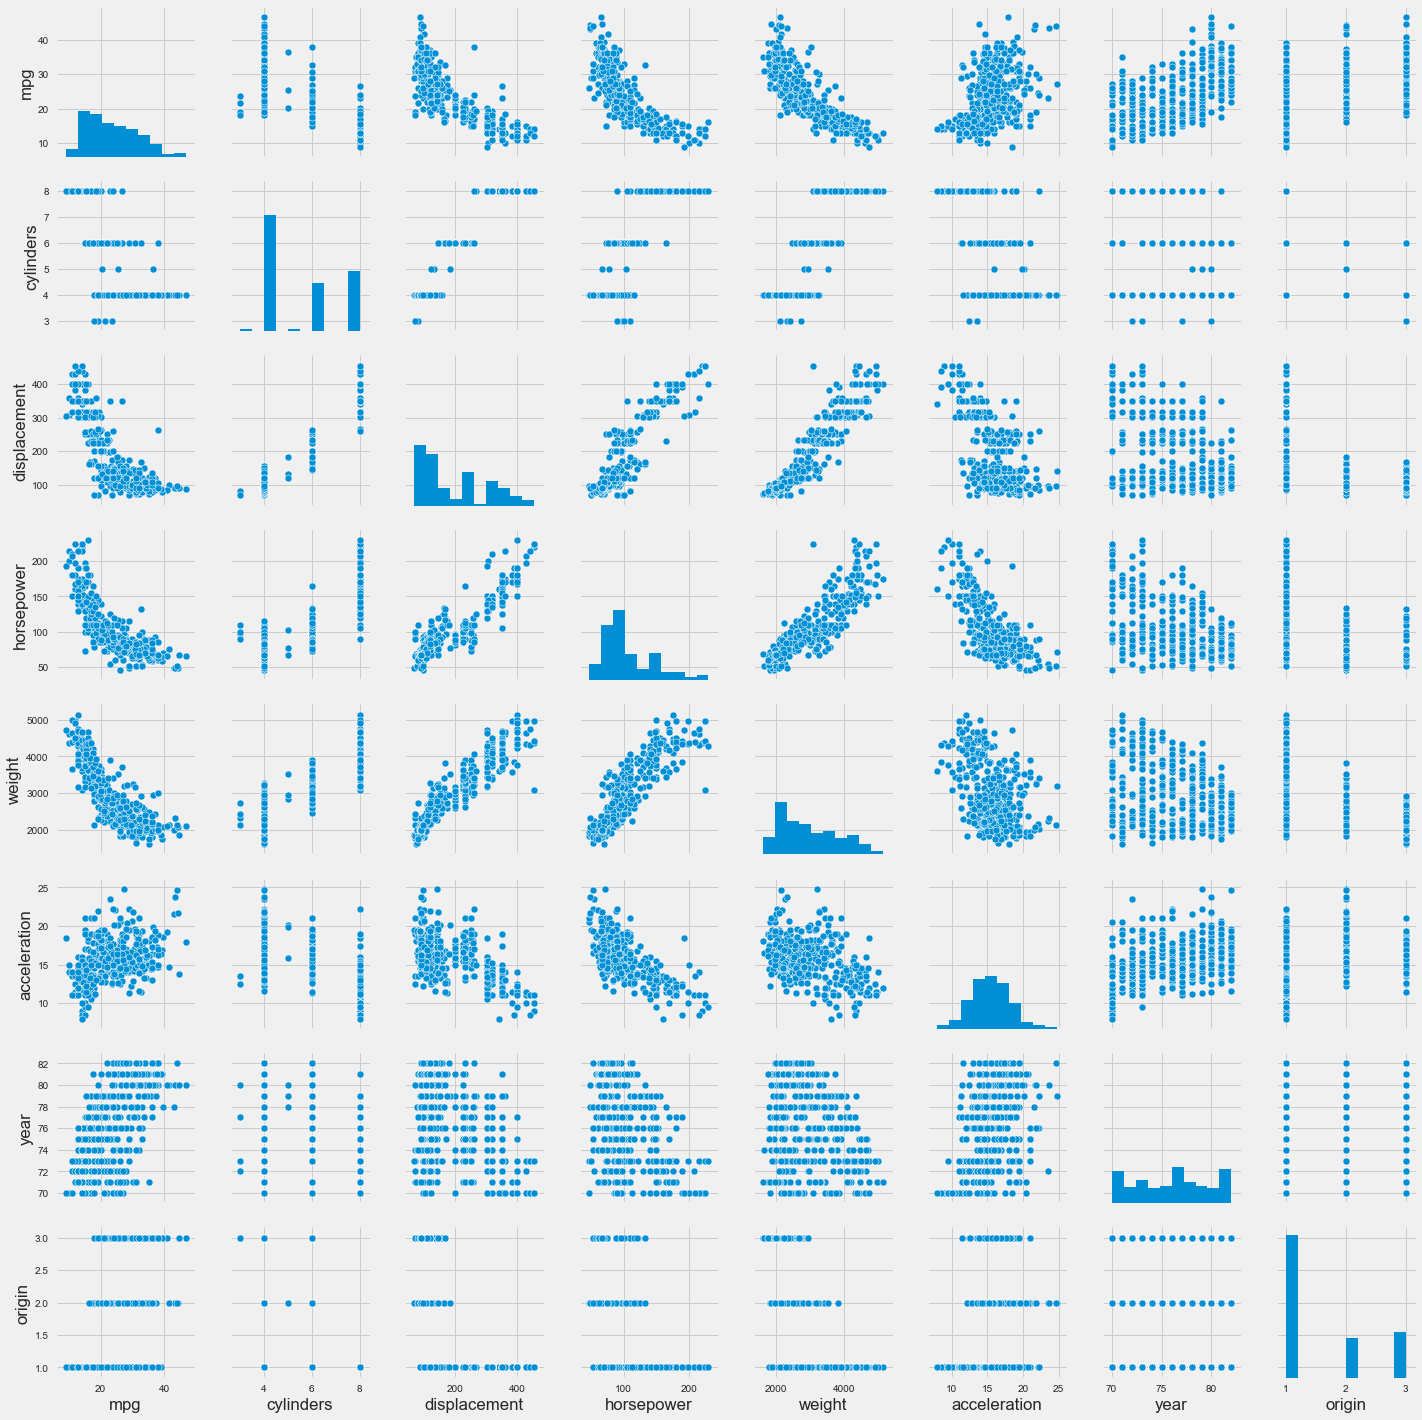

In [29]:
snp.pairplot(auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin']])

In [34]:
lm_quadratic=smf.ols(formula='mpg~horsepower+np.square(horsepower)',data=auto).fit()
lm_quadratic.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
np.square(horsepower),0.0012,0.000,10.080,0.000,0.001,0.001


In [36]:
lm_deg=smf.ols(formula='mpg~horsepower+np.power(horsepower,2)+np.power(horsepower,3)',data=auto).fit()
lm_deg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,60.6848,4.563,13.298,0.000,51.713,69.657
horsepower,-0.5689,0.118,-4.824,0.000,-0.801,-0.337
"np.power(horsepower, 2)",0.0021,0.001,2.193,0.029,0.000,0.004
"np.power(horsepower, 3)",-2.147e-06,2.38e-06,-0.903,0.367,-6.82e-06,2.53e-06


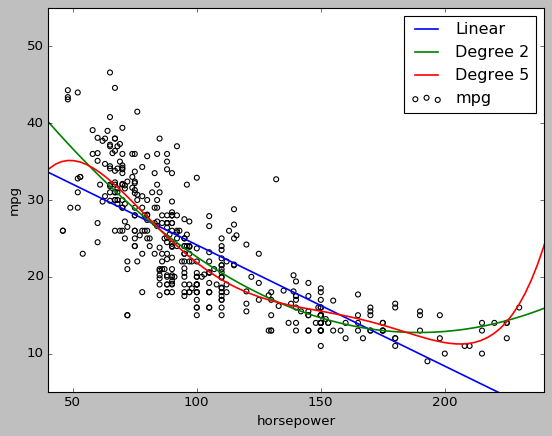

In [46]:
plt.style.use('classic')
plt.scatter(auto.horsepower, auto.mpg, facecolors='None', edgecolors='k') 
snp.regplot(auto.horsepower, auto.mpg, ci=None, label='Linear', scatter=False)
snp.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 2',order=2,scatter=False)
snp.regplot(auto.horsepower, auto.mpg, ci=None, label='Degree 5',order=5,scatter=False)
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

In [7]:
from sklearn.linear_model import LinearRegression  
advertising.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [33]:
x = advertising.loc[:,['TV', 'radio', 'newspaper'] ]   
y = advertising.sales
print(x.head(),'\n')


      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4 



In [31]:
x.shape , x.values.shape         

((200, 3), (200, 3))

In [32]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [35]:
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print(model.coef_)
list(zip(x.columns,model.coef_))

[ 0.04576465  0.18853002 -0.00103749]


[('TV', 0.045764645455397587),
 ('radio', 0.18853001691820459),
 ('newspaper', -0.0010374930424762452)]

In [42]:
model.intercept_

2.9388893694594085

In [44]:
model.score(x,y)

0.89721063817895208

In [48]:
y_pred=model.predict(x)
pd.DataFrame({'y_true':y,'y_pred':y_pred}).head(5)

,y_pred,y_true
1,20.523974,22.1
2,12.337855,10.4
3,12.307671,9.3
4,17.597830,18.5
5,13.188672,12.9


In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

boston = load_boston()
x = boston.data
y = boston.target

In [21]:
df = pd.DataFrame(x, columns= ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
obj_variables=list(df.dtypes[df.dtypes=='object'].index)
obj_variables

[]

In [23]:
numeric_variables=list(df.dtypes[df.dtypes!='object'].index)
numeric_variables

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [24]:
df.CHAS = df.CHAS.astype(np.object)
list(df.dtypes[df.dtypes == "object"].index)

['CHAS']

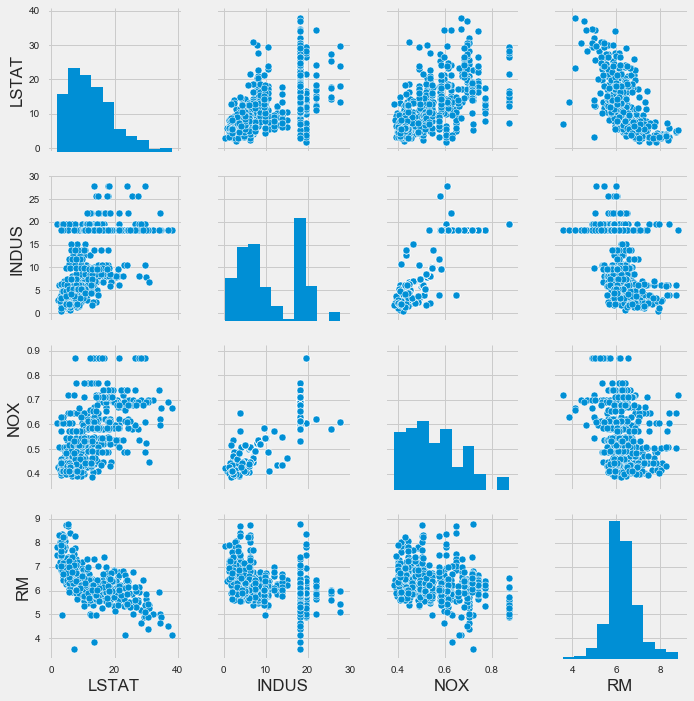

In [33]:
plt.style.use('fivethirtyeight')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM']
snp.pairplot(df[cols], size=2.5);

In [34]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

In [3]:
x = MinMaxScaler().fit_transform(boston.data)
x = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [4]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
lr=LinearRegression(normalize=False).fit(x_train,y_train)
print("training set R-square:{:.2f}".format(lr.score(x_train,y_train)))
print("test set R-square:{:.2f}".format(lr.score(x_test,y_test)))

training set R-square:0.95
test set R-square:0.61


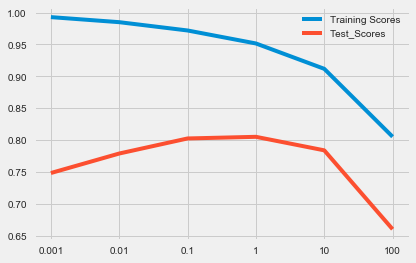

In [45]:
from sklearn.linear_model import Ridge
ridge_models = {}
training_scores = []
test_scores = []

for alpha in [.001, .01, .1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha).fit(x_train, y_train)
    training_scores.append(ridge.score(x_train, y_train))
    test_scores.append(ridge.score(x_test, y_test))
    ridge_models[alpha] = ridge
plt.plot()
plt.plot(training_scores,label="Training Scores")
plt.plot(test_scores,label="Test_Scores")
plt.xticks(range(6), [.001, .01, .1, 1, 10, 100])
plt.legend(loc="best")

In [47]:
name = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']
Boston = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", sep= '\s+', names=name)
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [84]:
lm_fit=smf.ols(formula='medv ~ lstat',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]

0.544146297586


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,34.5538,0.563,61.415,0.000,33.448,35.659
lstat,-0.9500,0.039,-24.528,0.000,-1.026,-0.874


In [85]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_new = pd.DataFrame({'lstat':[5,10,15]})
lm_fit.predict(X_new)

0    29.803594
1    25.053347
2    20.303101
dtype: float64

In [86]:
lm_fit=smf.ols(formula='medv ~ tax',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]

0.219525921044


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,32.9707,0.948,34.768,0.000,31.108,34.834
tax,-0.0256,0.002,-11.906,0.000,-0.030,-0.021


In [89]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_new = pd.DataFrame({'tax':[5,10,15]})
lm_fit.predict(X_new)

0    32.842814
1    32.714973
2    32.587133
dtype: float64

In [65]:
lm_fit=smf.ols(formula='medv ~ crim',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]

0.15078046905


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,24.0331,0.409,58.740,0.000,23.229,24.837
crim,-0.4152,0.044,-9.460,0.000,-0.501,-0.329


In [68]:
lm_fit=smf.ols(formula='medv ~ tax+lstat',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]

0.550570176395


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,35.8350,0.736,48.720,0.000,34.390,37.280
tax,-0.0052,0.002,-2.681,0.008,-0.009,-0.001
lstat,-0.8831,0.046,-19.248,0.000,-0.973,-0.793


In [80]:
lm_fit=smf.ols(formula='medv ~ age+lstat',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]
Boston.head()

0.551268937942


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [90]:
lm_fit=smf.ols(formula='medv ~ rm+lstat',data=Boston).fit()
print(lm_fit.rsquared)
lm_fit.summary().tables[1]
Boston.head()

0.63856160626


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [92]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_new = pd.DataFrame({'lstat':[5,10,15],'rm':[5,10,15]})
lm_fit.predict(X_new)

0    20.903875
1    43.166024
2    65.428172
dtype: float64